In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\BA_AirlineReviews.csv\BA_AirlineReviews.csv")
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [3]:
df.shape

(3701, 20)

In [4]:
df.describe()

,Unnamed: 0,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

In [6]:
print(df.isna().sum())

Unnamed: 0                  0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64


In [7]:
# Handle missing values of the columns
# fill missing values of numerical columns with mean.

df['OverallRating'].fillna(df['OverallRating'].mean(), inplace=True)
df['SeatComfort'].fillna(df['SeatComfort'].mean(), inplace=True)
df['CabinStaffService'].fillna(df['CabinStaffService'].mean(), inplace=True)
df['GroundService'].fillna(df['GroundService'].mean(), inplace=True)
df['ValueForMoney'].fillna(df['ValueForMoney'].mean(), inplace=True)


In [8]:
# Impute categorical columns with the most frequent value

df['TypeOfTraveller'].fillna(df['TypeOfTraveller'].mode()[0], inplace=True)
df['SeatType'].fillna(df['SeatType'].mode()[0], inplace=True)
df['Route'].fillna(df['Route'].mode()[0], inplace=True)
df['DateFlown'].fillna(df['DateFlown'].mode()[0], inplace=True)



In [9]:
# Drop column with a high proportion of missing values

df.drop(columns=['Wifi&Connectivity'], inplace=True)

## Univariate Visualizations

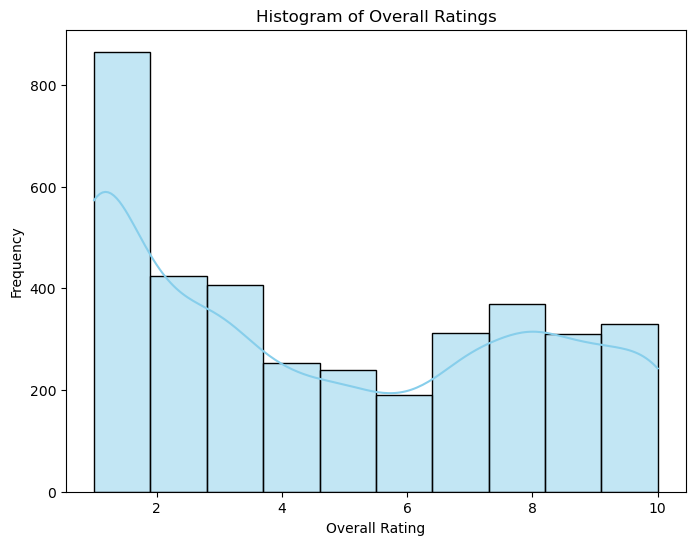

In [10]:
# Histogram of Overall Ratings

plt.figure(figsize=(8, 6))
sns.histplot(df['OverallRating'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()



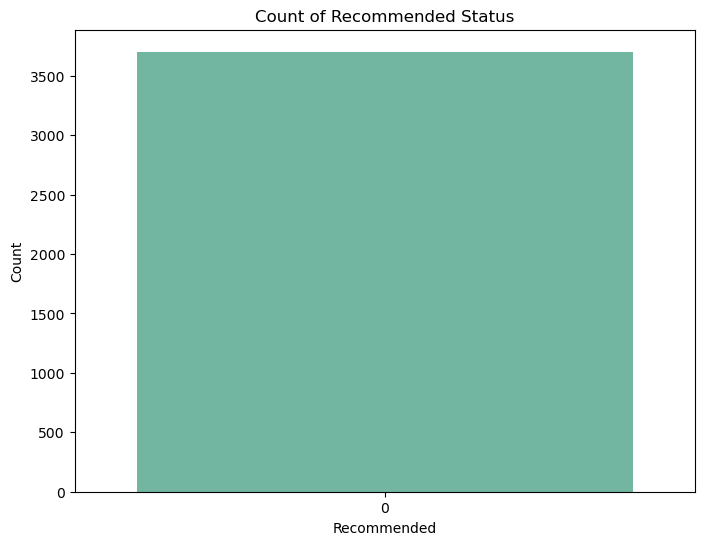

In [11]:
# Convert 'yes' and 'no' to 1 and 0

df['Recommended_numeric'] = df['Recommended'].map({'yes': 1, 'no': 0})

# Countplot for Recommended Status
plt.figure(figsize=(8, 6))
sns.countplot(df['Recommended_numeric'], palette='Set2')
plt.title('Count of Recommended Status')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()




## Bivariate Visualizations

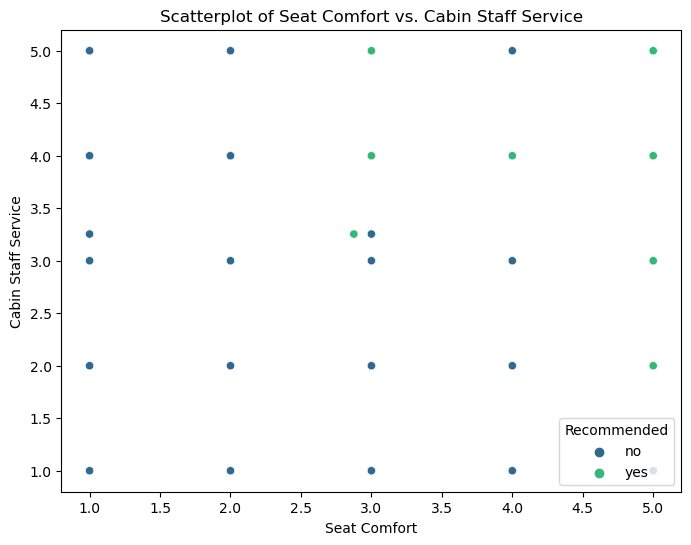

In [12]:
# Scatterplot of Seat Comfort Vs Cabin Staff Service

plt.figure(figsize=(8, 6))
sns.scatterplot(x='SeatComfort', y='CabinStaffService', data=df, hue='Recommended', palette='viridis')
plt.title('Scatterplot of Seat Comfort vs. Cabin Staff Service')
plt.xlabel('Seat Comfort')
plt.ylabel('Cabin Staff Service')
plt.show()



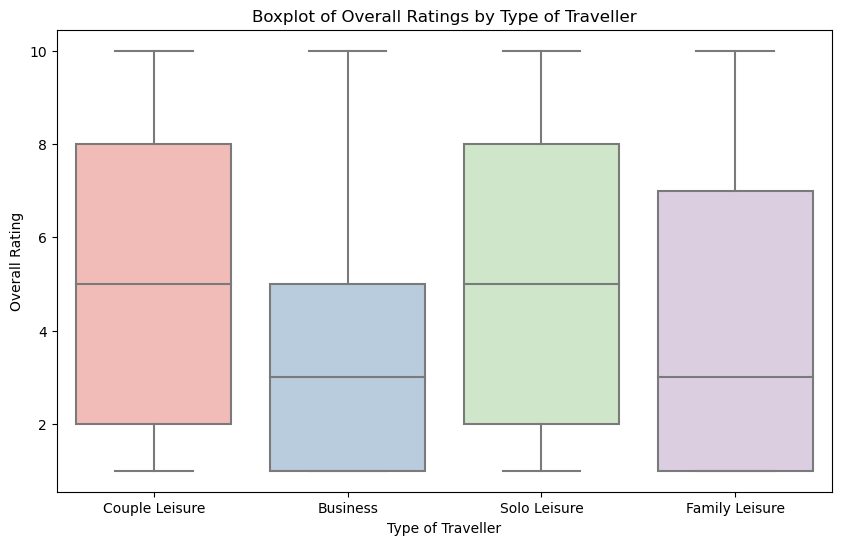

In [13]:
# Box Plot of Overall Ratings by Type of Traveller

plt.figure(figsize=(10, 6))
sns.boxplot(x='TypeOfTraveller', y='OverallRating', data=df, palette='Pastel1')
plt.title('Boxplot of Overall Ratings by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Overall Rating')
plt.show()



## Multivariate Visualizations

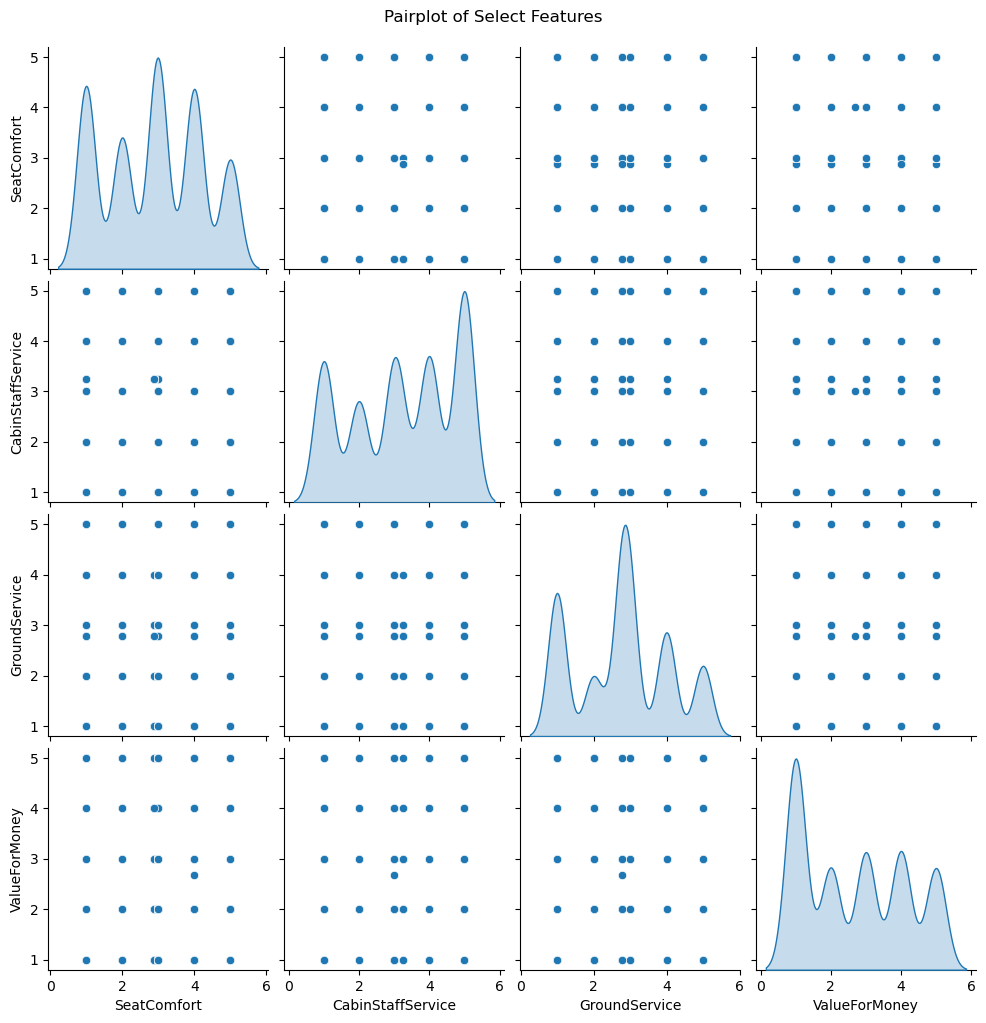

In [14]:
# Pairplot of the features
# Select features for pair plot

features = ['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney']

# Drop rows with null values in the selected features
df_pairplot = df[features].dropna()

# Create pair plot without specifying hue
sns.pairplot(df_pairplot, diag_kind='kde', markers='o', palette='husl')
plt.suptitle('Pairplot of Select Features', y=1.02)
plt.show()




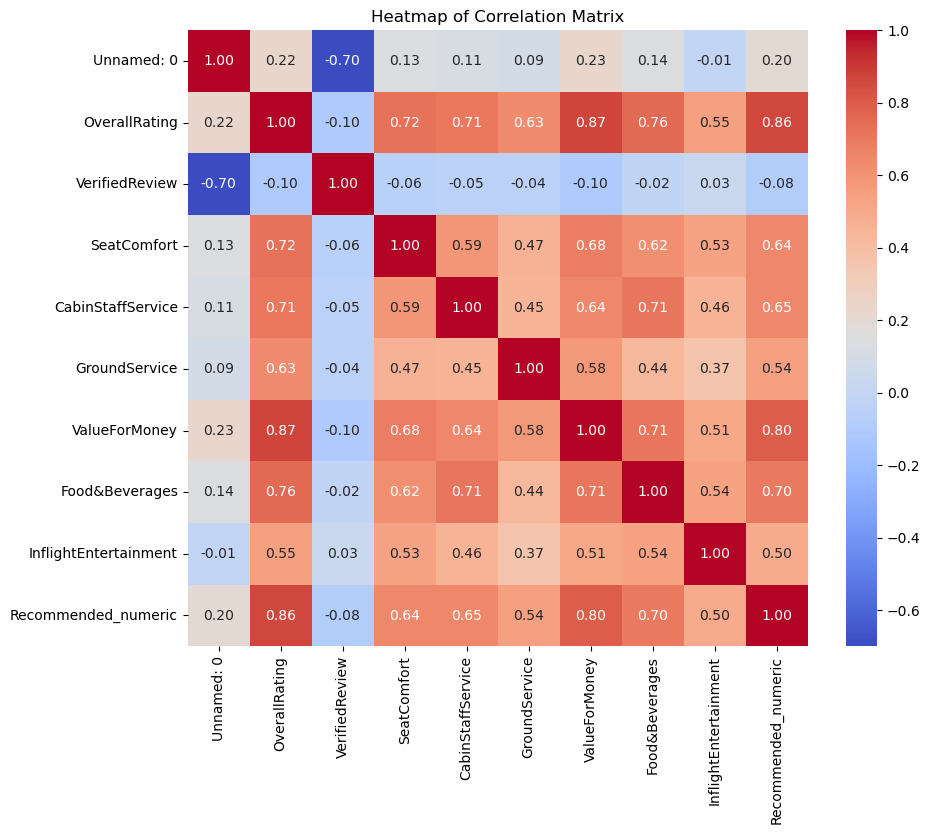

In [15]:
# Correlation Matrix

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()